# Esempio Prova Esonero - Metodi AI e Machine Learning per la fisica 



In [ ]:
!rm -rf PM25_data.csv
!wget http://giagu.web.cern.ch/giagu/CERN/PM25_data.csv 

--2023-04-03 17:40:27--  http://giagu.web.cern.ch/giagu/CERN/PM25_data.csv
Resolving giagu.web.cern.ch (giagu.web.cern.ch)... 188.184.21.205, 2001:1458:d00:34::100:59
Connecting to giagu.web.cern.ch (giagu.web.cern.ch)|188.184.21.205|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1385468 (1.3M) [text/csv]
Saving to: ‘PM25_data.csv’

PM25_data.csv       100%[===================>]   1.32M  2.17MB/s    in 0.6s    

2023-04-03 17:40:29 (2.17 MB/s) - ‘PM25_data.csv’ saved [1385468/1385468]



# **Descrizione del compito:**



### Dataset:

La task relativa al recupero primo esonero richiede di produrre un dataset artificiale come indicato nella descrizione del compito riportata più avanti.

La task relativa al recupero secondo esonero utilizza il dataset scaricabile eseguendo, dopo aver inserito i dati, la cella precedente. Il dataset è costituito da un file in formato .csv: "*PM25_data.csv*" costituito da 8 colonne (features) per 43824 righe (eventi/misure). Il dataset rappresenta misure di parametri legati al'inquinamento atmosferico presi da opportune centraline di misura ogni ora nell'arco di un certo numero di anni in una specifica città. Le feature disponibili sono:

* pm2.5: PM2.5 concentration (ug/m^3)
* DEWP: Dew Point 
* TEMP: Temperature
* PRES: Pressure (hPa)
* cbwd: Combined wind direction (codificato tramite interi)
* Iws: Cumulated wind speed (m/s)
* Is: Cumulated hours of snow
* Ir: Cumulated hours of rain


# **È richiesto:**


1.   produrre un dataset artificiale costituito da 3000 eventi per il training e 2000 eventi per il test che rappresenti diverse sovrapposizioni di segnali sinusoidali nel dominio del tempo e la loro corrispettiva trasformata di fourier nel dominio delle frequenze. Nello specifico ciascun evento deve essere costituito da una feature e da due target distinti: target_1 e target_2. 
> la feature è costituita da un vettore a 50 componenti in cui ogni componente rappresenta un campionamento della funzione sinusoidale g(t) con t dato da 50 valori equispaziati nell'intervallo (-\pi, \pi). <p> La funzione sinusoidale g(t) deve avere la forma: <p>$g(t) = \sum_{i=1}^{n} f_i \sin(k_i \cdot t)$, <p> in cui $n$ è un numero random intero estratto uniformememente in $[1,2]$ che rappresenta quanti componenti sinusoidali sono presenti in g(t), <p> $k_i$ è un numero intero random estratto uniformemente in $[1,20]$ che rappresenta la frequenza associata alla specifica componente sinusoidale, <p>  $f_i$ è una frazione random estratta uniforme in $[0,1]$ tale che $\sum{i=1}^{n} f_i = 1$, che pesa i diversi contributi sinusoidali in g(t).
> target_1 è costituito da un vettore a 1 componente che ha come valori il numero di componenti sinusoidali $n$ presenti nel evento;
> target_2 è costituito da un vettore che rappresenta la trasformata discreta di fourier della funzione $g(t)$ ed è ottenibile dal vettore di feature usando la funzione di numpy *np.fft.rfft(vettore di feature)*. <p> 
Esempio uso:
> 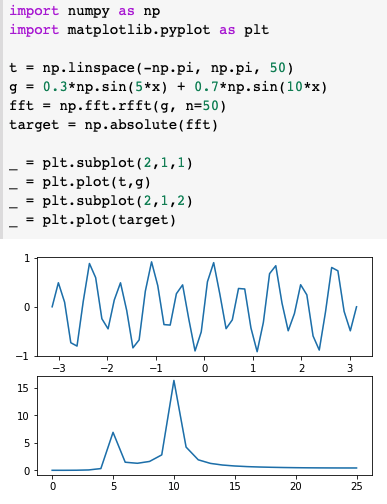

2.  addestrare un regressore basato su RandomForest per predire il target_1 a partire dagli eventi nello spazio dei tempi (feature), e stimarne le prestazioni
3.  addestrare un regressore multi-output basato sempre su RandomForest per predire il target_2 a partire dagli eventi nello spazio dei tempi (feature), e stimarne le prestazioni. Plottare per due esempi di eventi la distribuzione del ground truth (target_2) con sovrapposta la predizione del modello addestrato.

Commentare in modo sintetico le scelte e operazioni eseguite nello svolgimento dei vari punti del compito.

In [ ]:
# codice ...
#PUNTO 1
import numpy as np
import random as rd
import matplotlib.pyplot as plt

len_train = 3000
len_test = 2000

#Inizializzo features:
x_train = np.zeros(len_train*50)
x_train = np.reshape(x_train, (len_train, 50))
x_test = np.zeros(len_test*50)
x_test = np.reshape(x_test, (len_test, 50))
#Target 1:
y_train1 = np.zeros(len_train)
y_test1 = np.zeros(len_test)
#Target 2:
y_train2 = []
y_test2 = []

#Array di parametri usati nel loop
k = np.zeros(2)
f = np.zeros(2)

#Training sample
for i in range(len_train + len_test):
  #Per ogni evento dovrò seguire questo procedimento:  
  #Genero 50 valori equispaziati
  t = np.linspace(-np.pi, np.pi, 50)

  #Genero il numero di componenti di fourier da sovrapporre:
  n = rd.randint(1, 2)

  #Coefficiente moltiplicativo della singola componente
  if(n == 1):
    k[0] = rd.randint(1, 20)
    k[1] = 0
    f[0] = 1.
    f[1] = 0.
  else:
    k[0] = rd.randint(1, 20)
    k[1] = rd.randint(1, 20)
    f[0] = rd.random()
    f[1] = 1 - f[0]

  #Calcolo funzione
  g = f[0] * np.sin(k[0] * t) + f[1] * np.sin(k[1] * t)
  #Fast fourier transform
  fourier = np.fft.rfft(g, n = 50)

  #Aggiorno array delle features
  if (i < len_train):
    x_train[i] = g
  elif(i >= len_train):
    x_test[i - len_train] = g

  #Aggiorno arrays dei target
  if (i < len_train):
    y_train1[i] = n
    y_train2.append(np.absolute(fourier))
  elif(i >= len_train):
    y_test1[i - len_train] = n
    y_test2.append(np.absolute(fourier)) 


In [ ]:
#Vediamo lunghezze/shape degli array ottenuti
print("Shape x_train: {}".format(x_train.shape))
print("Shape x_test: {}".format(x_test.shape))
print("Shape target 1 (train): {}".format(y_train1.shape))
print("Shape target 1 (test): {}".format(y_test1.shape))
print("Shape target 2 (train): {}".format(np.shape(y_train2)))
print("Shape target 2 (test): {}".format(np.shape(y_test2)))

Shape x_train: (3000, 50)
Shape x_test: (2000, 50)
Shape target 1 (train): (3000,)
Shape target 1 (test): (2000,)
Shape target 2 (train): (3000, 26)
Shape target 2 (test): (2000, 26)


Numero modi: 2.0


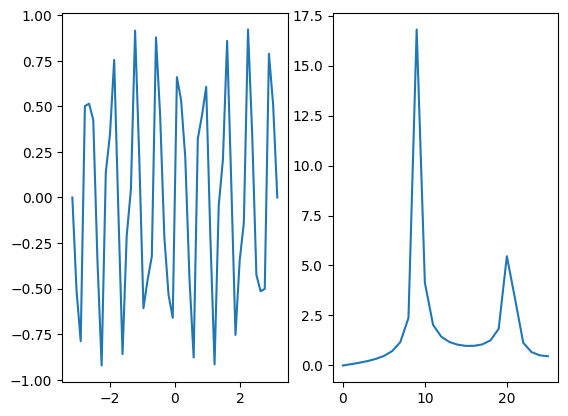

In [ ]:
#Test
plt.figure()
plt.subplot(1, 2, 1)
plt.plot(t, x_train[1999])
plt.subplot(1, 2, 2)
plt.plot(y_train2[1999])
print("Numero modi: {}".format(y_train1[1999]))
#Sembra tornare

min samples split 	 n estimators 	 train accuracy
2 			 2 		 0.9653333333333334 
2 			 12 		 0.9653333333333334 
2 			 23 		 0.9656666666666667 
2 			 34 		 0.9656666666666667 
2 			 45 		 0.9656666666666667 
2 			 56 		 0.9656666666666667 
2 			 67 		 0.9656666666666667 
2 			 78 		 0.9656666666666667 
2 			 89 		 0.9656666666666667 
2 			 100 		 0.9656666666666667 

10000 			 2 		 0.498 
10000 			 12 		 0.502 
10000 			 23 		 0.502 
10000 			 34 		 0.502 
10000 			 45 		 0.502 
10000 			 56 		 0.502 
10000 			 67 		 0.502 
10000 			 78 		 0.502 
10000 			 89 		 0.502 
10000 			 100 		 0.502 

Best accuracy: 0.9656666666666667 relative to best n estimators: 23 and best min samples: 2

Accuracy of test set: 0.974


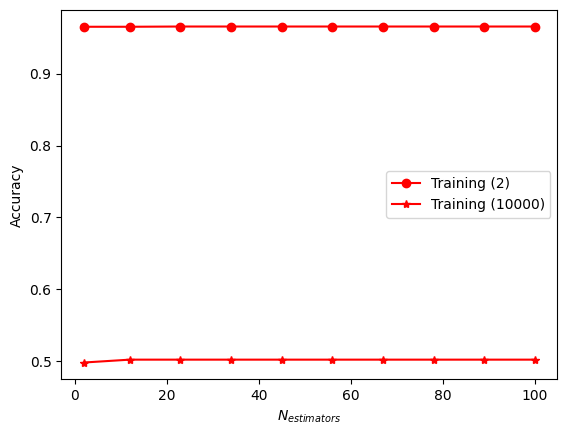

In [ ]:
#PUNTO 2
#RANDOM FOREST CLASSIFIER PER TARGET 1
from sklearn.ensemble import RandomForestClassifier
import warnings

#Disable warning messages
warnings.filterwarnings("ignore")

#Variables for getting best randomforest classifier
train_score = np.zeros(2*10)
train_score = np.reshape(train_score, (2, 10))
best_acc = 0.
best_min_samples = 0
best_estimator = 0
estimators = np.linspace(2, 100, 10, dtype = int)
min_samples = np.array([2, 10000])

print("min samples split \t n estimators \t train accuracy")
#External loop on min_samples_split
for i in range(2):
  #Internal loop on ramification order
  for j in range(len(estimators)):  
    clf = RandomForestClassifier(n_estimators = estimators[j], min_samples_split = min_samples[i])
    clf.fit(x_train, y_train1)

    #score on training set
    train_score[i][j] = clf.score(x_train, y_train1)

    #Best accuracy
    if(train_score[i][j] > best_acc):
      best_acc = train_score[i][j]
      best_estimator = estimators[j]
      best_min_samples = min_samples[i]

    #print results
    print("{} \t\t\t {} \t\t {} ".format(min_samples[i], estimators[j], train_score[i][j]))
  print()

#print best stuff
print("Best accuracy: {} relative to best n estimators: {} and best min samples: {}".format(best_acc, best_estimator, best_min_samples))
print()

#Accuracy on test set with optimal parameters
clf = RandomForestClassifier(n_estimators = best_estimator, min_samples_split = best_min_samples)
clf.fit(x_train, y_train1)
test_score_forest = clf.score(x_test, y_test1)
print("Accuracy of test set: {}".format(test_score_forest))
#Prediction
prediction_forest = clf.predict(x_test)

#Plot
plt.figure()
formato = ''
plt.xlabel('$N_{estimators}$')
plt.ylabel("Accuracy")
for i in range(2):
  if(i == 0):
    formato = '-o'
  else:
    formato = '-*'
  plt.plot(estimators, train_score[i], '{}'.format(formato), label = 'Training ({})'.format(min_samples[i]), color = 'red')

plt.legend()

In [ ]:
#Stima prestazioni

clf = RandomForestClassifier(n_estimators = best_estimator, min_samples_split = best_min_samples)
clf.fit(x_train, y_train1)
test_score = clf.score(x_test, y_test1)

print("Test accuracy: {}".format(test_score))


Test accuracy: 0.973


In [ ]:
#PUNTO 3
#RANDOM FOREST CLASSIFIER PER TARGET 2
from sklearn.ensemble import RandomForestClassifier
import warnings

#Disable warning messages
warnings.filterwarnings("ignore")

#Variables for getting best randomforest classifier
train_score = np.zeros(2*10)
train_score = np.reshape(train_score, (2, 10))
best_acc = 0.
best_min_samples = 0
best_estimator = 0
estimators = np.linspace(2, 100, 10, dtype = int)
min_samples = np.array([2, 10000])

print("min samples split \t n estimators \t train accuracy")
#External loop on min_samples_split
for i in range(2):
  #Internal loop on ramification order
  for j in range(len(estimators)):  
    clf = RandomForestClassifier(n_estimators = estimators[j], min_samples_split = min_samples[i])
    clf.fit(x_train, y_train2)

    #score on training set
    train_score[i][j] = clf.score(x_train, y_train2)

    #Best accuracy
    if(train_score[i][j] > best_acc):
      best_acc = train_score[i][j]
      best_estimator = estimators[j]
      best_min_samples = min_samples[i]

    #print results
    print("{} \t\t\t {} \t\t {} ".format(min_samples[i], estimators[j], train_score[i][j]))
  print()

#print best stuff
print("Best accuracy: {} relative to best n estimators: {} and best min samples: {}".format(best_acc, best_estimator, best_min_samples))
print()

#Accuracy on test set with optimal parameters
clf = RandomForestClassifier(n_estimators = best_estimator, min_samples_split = best_min_samples)
clf.fit(x_train, y_train2)
test_score_forest = clf.score(x_test, y_test2)
print("Accuracy of test set: {}".format(test_score_forest))
#Prediction
prediction_forest = clf.predict(x_test)

#Plot
plt.figure()
formato = ''
plt.xlabel('$N_{estimators}$')
plt.ylabel("Accuracy")
for i in range(2):
  if(i == 0):
    formato = '-o'
  else:
    formato = '-*'
  plt.plot(estimators, train_score[i], '{}'.format(formato), label = 'Training ({})'.format(min_samples[i]), color = 'red')

plt.legend()

min samples split 	 n estimators 	 train accuracy


ValueError: ignored